# Import SQLite database from Kaggle
---

In [ ]:
!pip install eralchemy


In [ ]:
# import eralchemy
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir -p ~/.kaggle/
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d lennykiruthu/linkedin-jobs-sqlite --unzip -p ./data

The following table are in our database: [('companies',), ('skills',), ('industries',), ('positions',), ('company_industries',), ('company_specialities',), ('employee_count',), ('job_skills',), ('job_industries',)]


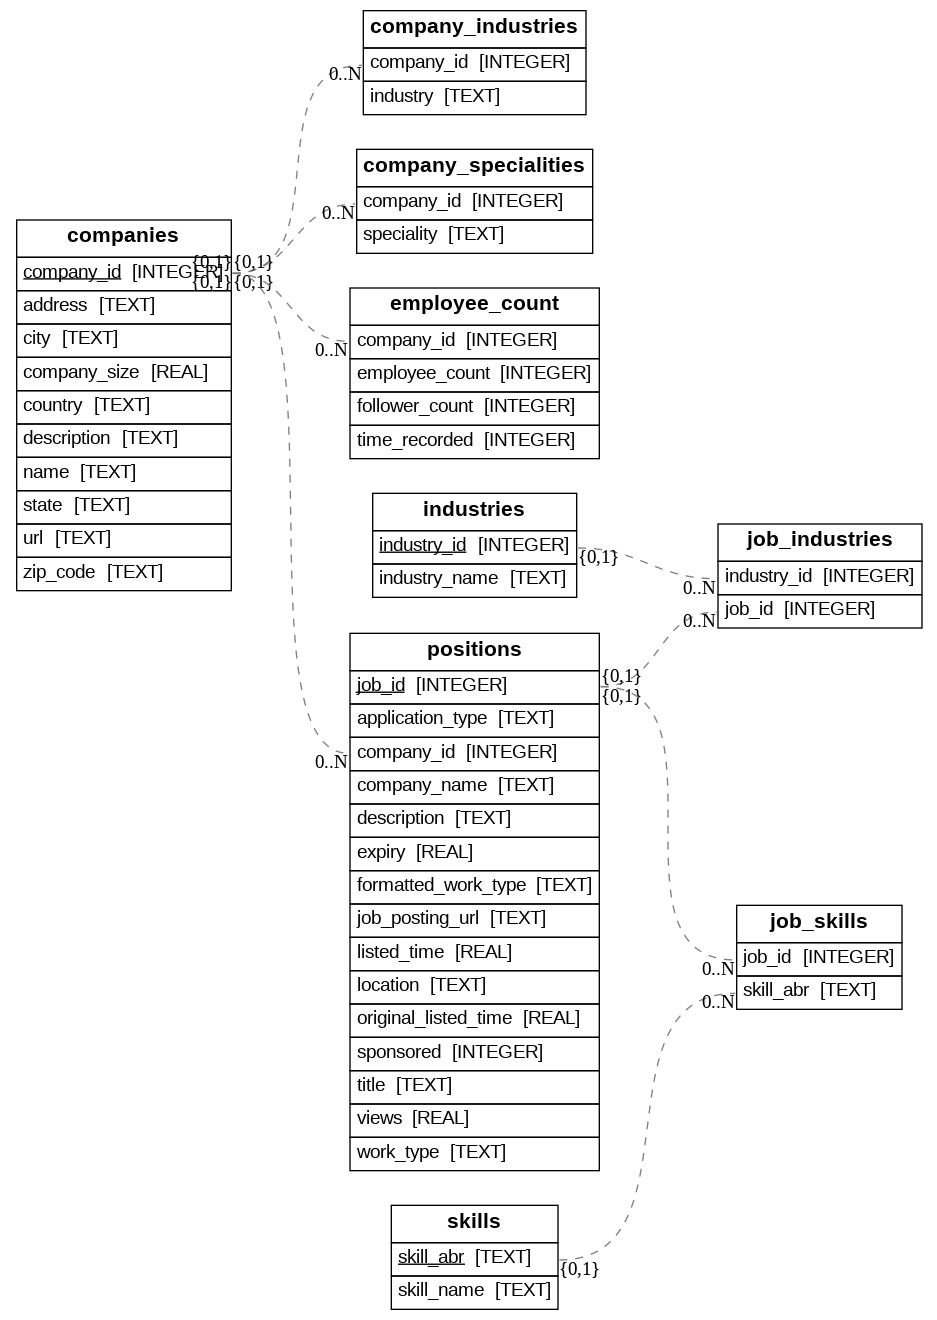

In [ ]:
import sqlite3
import pandas as pd
from IPython.display import Image

conn = sqlite3.connect('/kaggle/input/linkedin-jobs-sqlite/linkedin_jobs.db')
cur  = conn.cursor()

cur.execute("SELECT name FROM  sqlite_master WHERE type='table'")
print(f"The following table are in our database: {cur.fetchall()}")


!mkdir -p /kaggle/working/linkedin-jobs-sqlite
!cp /kaggle/input/linkedin-jobs-sqlite/linkedin_jobs.db /kaggle/working/linkedin-jobs-sqlite/tmp_linkedin_jobs.db
!eralchemy -i sqlite:////kaggle/working/linkedin-jobs-sqlite/tmp_linkedin_jobs.db -o /kaggle/working/linkedin-jobs-sqlite/linkedin_jobs_erd.dot
!dot -Tpng /kaggle/working/linkedin-jobs-sqlite/linkedin_jobs_erd.dot -o /kaggle/working/linkedin-jobs-sqlite/linkedin_jobs_erd.png
Image(filename='/kaggle/working/linkedin-jobs-sqlite/linkedin_jobs_erd.png')

# Exploratory Data Analaysis
---

In [ ]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
positions_df            = pd.read_sql("SELECT * FROM positions;", conn)
companies_df            = pd.read_sql("SELECT * FROM companies;", conn)
skills_df               = pd.read_sql("SELECT * FROM skills;", conn)
industries_df           = pd.read_sql("SELECT * FROM industries;", conn)
company_industries_df   = pd.read_sql("SELECT * FROM company_industries;", conn)
company_specialities_df = pd.read_sql("SELECT * FROM company_specialities;", conn)
employee_count_df       = pd.read_sql("SELECT * FROM employee_count;", conn)
job_skills_df           = pd.read_sql("SELECT * FROM job_skills;", conn)
job_industries_df       = pd.read_sql("SELECT * FROM job_industries;", conn)

In [ ]:
def explore(title, df):
  display(Markdown(title))
  display(df.head(10))
  display(Markdown('## Descriptive Statistics'))
  display(df.describe())
  display(Markdown('## Missing Values'))
  display(df.isnull().sum().sort_values(ascending=False))
  display(Markdown('## Data Types'))
  display(df.dtypes)
  display(Markdown('## Shape'))
  display(df.shape)

explore("# Positions Dataframe", positions_df)

# Positions Dataframe

,job_id,company_name,title,description,location,company_id,views,formatted_work_type,original_listed_time,job_posting_url,application_type,expiry,listed_time,sponsored,work_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,"Princeton, NJ",2774458,20.0,Full-time,1.713398e+12,https://www.linkedin.com/jobs/view/921716/?trk...,ComplexOnsiteApply,1.715990e+12,1.713398e+12,0,FULL_TIME
1,1218575,Children's Nebraska,Respiratory Therapist,"At Children’s, the region’s only full-service ...","Omaha, NE",721189,3.0,Full-time,1.712348e+12,https://www.linkedin.com/jobs/view/1218575/?tr...,OffsiteApply,1.714940e+12,1.712348e+12,0,FULL_TIME
2,2264355,Bay West Church,Worship Leader,It is an exciting time to be a part of our chu...,"Palm Bay, FL",28631247,5.0,Part-time,1.712456e+12,https://www.linkedin.com/jobs/view/2264355/?tr...,ComplexOnsiteApply,1.715048e+12,1.712456e+12,0,PART_TIME
3,9615617,"Glastender, Inc.",Inside Customer Service Associate,Glastender Inc. is a family-owned manufacturer...,"Saginaw, MI",1194336,4.0,Full-time,1.713211e+12,https://www.linkedin.com/jobs/view/9615617/?tr...,ComplexOnsiteApply,1.715803e+12,1.713211e+12,0,FULL_TIME
4,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,"Cincinnati, OH",64896719,8.0,Full-time,1.713278e+12,https://www.linkedin.com/jobs/view/10998357/?t...,ComplexOnsiteApply,1.715870e+12,1.713278e+12,0,FULL_TIME
5,11009123,PGAV Destinations,Project Architect,PGAV Destinations is seeking a self-motivated ...,"St Louis, MO",93456,2.0,Full-time,1.712858e+12,https://www.linkedin.com/jobs/view/11009123/?t...,ComplexOnsiteApply,1.715450e+12,1.712858e+12,0,FULL_TIME
6,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262,16.0,Full-time,1.712896e+12,https://www.linkedin.com/jobs/view/23221523/?t...,ComplexOnsiteApply,1.715488e+12,1.712896e+12,0,FULL_TIME
7,69333422,Staffing Theory,Senior Product Marketing Manager,A leading pharmaceutical company committed to ...,United States,27097933,2.0,Full-time,1.713537e+12,https://www.linkedin.com/jobs/view/69333422/?t...,ComplexOnsiteApply,1.729089e+12,1.713537e+12,0,FULL_TIME
8,83789755,OsteoStrong,Osteogenic Loading Coach,"Company DescriptionOsteoStrong® is not a gym, ...","Anchorage, AK",3810432,4.0,Full-time,1.713466e+12,https://www.linkedin.com/jobs/view/83789755/?t...,ComplexOnsiteApply,1.716058e+12,1.713466e+12,0,FULL_TIME
9,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,"Raleigh, NC",1481176,9.0,Internship,1.713456e+12,https://www.linkedin.com/jobs/view/91700727/?t...,ComplexOnsiteApply,1.716048e+12,1.713456e+12,0,INTERNSHIP


## Descriptive Statistics

,job_id,company_id,views,original_listed_time,expiry,listed_time,sponsored
count,1.221310e+05,1.221310e+05,120504.000000,1.221310e+05,1.221310e+05,1.221310e+05,122131.0
mean,3.897048e+09,1.220392e+07,14.631498,1.713153e+12,1.716174e+12,1.713205e+12,0.0
std,7.138470e+07,2.554151e+07,86.236758,4.835365e+08,2.217527e+09,3.985891e+08,0.0
min,9.217160e+05,1.009000e+03,1.000000,1.701811e+12,1.712903e+12,1.711317e+12,0.0
25%,3.894609e+09,1.435200e+04,3.000000,1.712863e+12,1.715481e+12,1.712887e+12,0.0
50%,3.902312e+09,2.269650e+05,4.000000,1.713395e+12,1.716042e+12,1.713408e+12,0.0
75%,3.904709e+09,8.047188e+06,8.000000,1.713478e+12,1.716088e+12,1.713484e+12,0.0
max,3.906267e+09,1.034730e+08,9975.000000,1.713573e+12,1.729125e+12,1.713573e+12,0.0


## Missing Values

views                   1627
description                6
company_name               1
title                      0
job_id                     0
location                   0
company_id                 0
formatted_work_type        0
original_listed_time       0
job_posting_url            0
application_type           0
expiry                     0
listed_time                0
sponsored                  0
work_type                  0
dtype: int64

## Data Types

job_id                    int64
company_name             object
title                    object
description              object
location                 object
company_id                int64
views                   float64
formatted_work_type      object
original_listed_time    float64
job_posting_url          object
application_type         object
expiry                  float64
listed_time             float64
sponsored                 int64
work_type                object
dtype: object

## Shape

(122131, 15)

In [ ]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00:00:0100:01


In [1]:
from sentence_transformers import SentenceTransformer
from huggingface_hub import snapshot_download
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
import re
import spacy

In [ ]:
stem_list = ['Data', 'Software', 'Engineer', 'Math', 'Account', 'Finance', 'Biology', 'Physics', 'Cloud', 'Full Stack', 'AI', 'ML', 'Machine Learning',
            'Deep Learning', 'DevOps', 'Backend', 'Mechanical', 'Electrical', 'Civil', 'Chemical', 'Industrial', 'Chemistry', 'Auditor', 'Actuary',
            'Banking', 'Research']

pattern = "|".join(stem_list)

# Apply to the title column to create a boolean mask
positions_df['stem_match'] = positions_df['title'].str.contains(pattern, case=False, na=False)

# Optional: Filter rows that match
stem_positions_df = positions_df[positions_df['stem_match']].copy()

display(stem_positions_df.head(10))
print(stem_positions_df.shape)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,job_id,company_name,title,description,location,company_id,views,formatted_work_type,original_listed_time,job_posting_url,application_type,expiry,listed_time,sponsored,work_type,stem_match
16,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,"Denver, CO",76987056,273.0,Part-time,1.713281e+12,https://www.linkedin.com/jobs/view/175485704/?...,ComplexOnsiteApply,1.715873e+12,1.713281e+12,0,PART_TIME,True
24,266825034,Recruitment Design,Software Support Specialist,Are you driven by the thrill of solving proble...,"McLean, VA",99212509,NaN,Full-time,1.712860e+12,https://www.linkedin.com/jobs/view/266825034/?...,ComplexOnsiteApply,1.728412e+12,1.712860e+12,0,FULL_TIME,True
37,1129235875,"TURNER HYDRAULICS, INC",Industrial Sales Representative,&nbsp;Job descriptionTurner Hydraulics Inc. is...,"Lancaster, PA",53824769,3.0,Full-time,1.713208e+12,https://www.linkedin.com/jobs/view/1129235875/...,ComplexOnsiteApply,1.715800e+12,1.713208e+12,0,FULL_TIME,True
50,2147609816,The Job Network,Maintenance Mechanic,We're growing! Caffeinate Your Career™ at MZB!...,"Suffolk, VA",167757,2.0,Full-time,1.712904e+12,https://www.linkedin.com/jobs/view/2147609816/...,OffsiteApply,1.715496e+12,1.712904e+12,0,FULL_TIME,True
56,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",United States,69611476,21.0,Full-time,1.713493e+12,https://www.linkedin.com/jobs/view/2234533717/...,ComplexOnsiteApply,1.716085e+12,1.713493e+12,0,FULL_TIME,True
61,2428973832,"Grow West MD, LLC",Staff Accountant,The ideal candidate will be responsible for ti...,"Cumberland, MD",59147406,2.0,Full-time,1.713530e+12,https://www.linkedin.com/jobs/view/2428973832/...,ComplexOnsiteApply,1.716122e+12,1.713530e+12,0,FULL_TIME,True
63,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...","Foster City, CA",2610793,NaN,Contract,1.713480e+12,https://www.linkedin.com/jobs/view/2558399667/...,ComplexOnsiteApply,1.716072e+12,1.713480e+12,0,CONTRACT,True
65,2747409392,ViaBot,Robot Monitor & Maintenance Technician,Robot Monitor & Maintenance TechnicianAt ViaBo...,"Sunnyvale, CA",18344349,7.0,Full-time,1.712643e+12,https://www.linkedin.com/jobs/view/2747409392/...,ComplexOnsiteApply,1.715235e+12,1.712643e+12,0,FULL_TIME,True
73,2934066464,Dynamic SRG,Fundraising Associate,The firm:Dynamic SRG is a boutique political c...,New York City Metropolitan Area,10104312,11.0,Full-time,1.712347e+12,https://www.linkedin.com/jobs/view/2934066464/...,SimpleOnsiteApply,1.714939e+12,1.712347e+12,0,FULL_TIME,True
81,3045980831,Armstrong Builders LLC,Project Engineer,JOB DESCRIPTION:The Project Engineer assists t...,"Kailua-Kona, HI",2316373,4.0,Full-time,1.713481e+12,https://www.linkedin.com/jobs/view/3045980831/...,ComplexOnsiteApply,1.729033e+12,1.713481e+12,0,FULL_TIME,True


(29212, 16)


In [ ]:
titles = stem_positions_df['title'].fillna("").tolist()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Convert job titles into numerical vectors (embeddings)
# - batch_size=256: processes 256 titles at a time for efficiency
# - show_progress_bar=True: shows progress while encoding
# - normalize_embeddings=True: scales embeddings to unit length so cosine similarity can be used directly
titles_emb = model.encode(
    titles,
    batch_size=256,
    show_progress_bar=True,
    normalize_embeddings=True  # makes cosine similarity easier
)

# Download the model from the Hub
model_path = snapshot_download("amjad-awad/skill-extractor", repo_type="model")

# Load the model with spaCy
nlp = spacy.load(model_path)

Processing KMeans with 10 clusters (3.45%)
0.07259319
Processing KMeans with 20 clusters (6.90%)
0.06612253
Processing KMeans with 30 clusters (10.34%)
0.06667317
Processing KMeans with 40 clusters (13.79%)
0.07575796
Processing KMeans with 50 clusters (17.24%)
0.07395375
Processing KMeans with 60 clusters (20.69%)
0.07905307
Processing KMeans with 70 clusters (24.14%)
0.08434861
Processing KMeans with 80 clusters (27.59%)
0.09093162
Processing KMeans with 90 clusters (31.03%)
0.0978546
Processing KMeans with 100 clusters (34.48%)
0.10242351
Processing KMeans with 110 clusters (37.93%)
0.10611887
Processing KMeans with 120 clusters (41.38%)
0.10802528
Processing KMeans with 130 clusters (44.83%)
0.10876406
Processing KMeans with 140 clusters (48.28%)
0.112972625
Processing KMeans with 150 clusters (51.72%)
0.118206844
Processing KMeans with 160 clusters (55.17%)
0.11887781
Processing KMeans with 170 clusters (58.62%)
0.11938385
Processing KMeans with 180 clusters (62.07%)
0.12257719
Pr

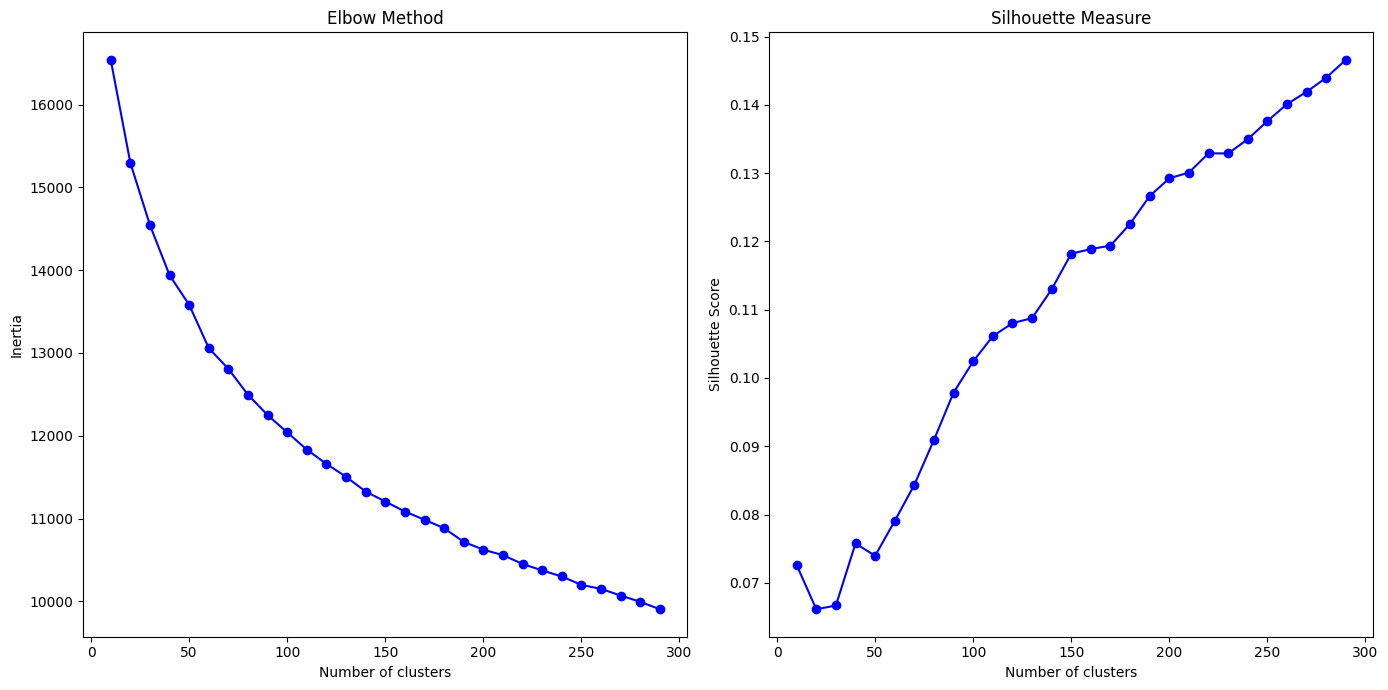

In [ ]:
inertia = []
sil_scores = []
K = range(10, 300, 10)

for i, k in enumerate(K):
    print(f"Processing KMeans with {k} clusters ({(i+1)/len(K)*100:.2f}%)")
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(titles_emb)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(titles_emb, kmeans.labels_)
    sil_scores.append(score)
    print(score)

fig, ax = plt.subplots(1, 2, figsize=(14,7))

ax[0].plot(K, inertia, 'bo-')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Method')

ax[1].plot(K, sil_scores, 'bo-')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Measure')

plt.tight_layout()
plt.show()


More clusters may lead to a silhouette score closer to 1 but too many clusters will dilute the job titles too much. I'll opt to continue with 100 clusters for now.


In [ ]:
# Set the number of clusters for KMeans
k = 100
km_titles = KMeans(n_clusters=k, n_init="auto", random_state=42)

# Fit the KMeans model on the title embeddings and get cluster labels for each title
# title_labels is an array where each element corresponds to the cluster assignment of a title
title_labels = km_titles.fit_predict(titles_emb)

# Assign the cluster labels to the original DataFrame
# This adds a new column 'cluster_id' indicating which cluster each job title belongs to
stem_positions_df['cluster_id'] = title_labels

In [ ]:
score = silhouette_score(titles_emb, title_labels)
print(score)

0.10242351


In [ ]:
# Create a dictionary to map each cluster ID to a representative job title
cluster_name_map = {}

# Loop over each cluster index (0 to k-1)
for i in range(k):
    # Find indices of all titles that belong to cluster i
    cluster_indices = np.where(title_labels == i)[0]

    # Get the centroid vector of cluster i
    centroid = km_titles.cluster_centers_[i]

    # Compute the Euclidean distance from each title in the cluster to the centroid
    distances = np.linalg.norm(titles_emb[cluster_indices] - centroid, axis=1)

    # Find the index of the title closest to the centroid (most representative)
    nearest_idx = cluster_indices[np.argmin(distances)]

    # Map cluster i to this representative title
    cluster_name_map[i] = titles[nearest_idx]

# Add a new column to the DataFrame with the cluster's representative title
# This gives each row a human-readable cluster name
stem_positions_df['cluster_name'] = stem_positions_df['cluster_id'].map(cluster_name_map)


In [ ]:
unique_clusters = stem_positions_df['cluster_name'].unique().tolist()
print(unique_clusters)

['Software Engineer', 'Staff Engineer (Software)', 'Sales Representative, Industrial', 'Maintenance Mechanic', 'Full Stack Engineer', 'Staff Accountant  ', 'Validation Engineer', 'Maintenance Technician', 'Marketing Campaign Specialist', 'Project Engineer', 'Data Engineer', 'Account Manager', 'Account Executive', 'Accounting Manager', 'Nursing Assistant - Hamilton - 4 Main Med Surg Ortho - FT/Nights', 'Retail Sales Associate', 'Data Specialist', 'Engineering Technician', 'Engineering Manager', 'Account Specialist', 'Sales Engineer', 'Senior Software Engineer', 'Fleet Engineering Specialist', 'Maintenance Manager', 'Senior Engineer', 'Embedded Engineer', 'Mechanical Engineer', 'Quality Engineer', 'Industrial Painter', 'Finance Manager', 'Engineer', 'Accounts Payable Specialist', 'Vice President Finance', 'Data Engineer - Remote', 'Staff Engineer - Mechanical Component', 'Sr Software Engineer', 'Finance Intern', 'Regulatory Affairs Specialist', 'Accountant', 'Math Teacher - High School',

In [ ]:
def clean_text(text):
    if text is None:
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text

stem_positions_df['clean_desc'] = stem_positions_df['description'].apply(clean_text)

In [ ]:
"""
This block extracts and assigns the top skills for each KMeans cluster of job descriptions.

Process overview:
1. Initializes an empty list column to store skills per row.
2. Loops over each unique cluster:
   a. Selects all rows belonging to the cluster.
   b. Uses a spaCy NLP pipeline to extract named entities from the cleaned job descriptions.
   c. Filters entities labeled as SKILLS and counts all mentions.
   d. Determines the top 30 most frequent skills for the cluster.
   e. For each job description, keeps only the skills that appear in the top 30.
3. Assigns these filtered top skills back to the DataFrame under 'cluster_skills'.

Result:
Each row now has a 'cluster_skills' list containing the most relevant skills for its cluster,
making it easier to analyze skill trends across job title clusters.
"""

# Initialize the new column
stem_positions_df["cluster_skills"] = [[] for _ in range(len(stem_positions_df))]

# Get total number of clusters for progress tracking
total_clusters = len(stem_positions_df["cluster_id"].unique())
print(f"Starting processing of {total_clusters} clusters...")

# Loop over each cluster
for i, cluster_id in enumerate(stem_positions_df["cluster_id"].unique()):
    print(f"Processing cluster {cluster_id} ({i+1}/{total_clusters}) - {((i+1)/total_clusters)*100:.1f}% complete")

    cluster_rows = stem_positions_df[stem_positions_df["cluster_id"] == cluster_id]
    print(f"  → Cluster {cluster_id} has {len(cluster_rows)} rows")

    # Extract skills per description
    skill_list_per_desc = [doc.ents for doc in nlp.pipe(cluster_rows["clean_desc"], batch_size=32)]

    # Flatten and filter only SKILLS
    all_skills = []
    for ents in skill_list_per_desc:
        skills = [ent.text for ent in ents if "SKILLS" in ent.label_]
        all_skills.extend(skills)

    print(f"  → Found {len(all_skills)} total skill mentions in cluster {cluster_id}")

    # Top 30 most frequent skills
    top_30_skills = [s for s, _ in Counter(all_skills).most_common(30)]
    print(f"  → Top 30 skills identified for cluster {cluster_id}")

    # Assign top skills per description (only keep those in top 30)
    filtered_skills_per_desc = []
    for ents in skill_list_per_desc:
        skills = [ent.text for ent in ents if "SKILLS" in ent.label_]
        filtered_skills_per_desc.append([s for s in skills if s in top_30_skills])

    # Assign back to the DataFrame
    cluster_indices = stem_positions_df[stem_positions_df["cluster_id"] == cluster_id].index
    for j, skills in enumerate(filtered_skills_per_desc):
        stem_positions_df.at[cluster_indices[j], "cluster_skills"] = skills

    print(f"  → Cluster {cluster_id} assignment complete\n")

print("✅ Done! Top 30 skills assigned per cluster.")

Starting processing of 100 clusters...
Processing cluster 14 (1/100) - 1.0% complete
  → Cluster 14 has 492 rows
  → Found 6739 total skill mentions in cluster 14
  → Top 30 skills identified for cluster 14
  → Cluster 14 assignment complete

Processing cluster 31 (2/100) - 2.0% complete
  → Cluster 31 has 622 rows
  → Found 6408 total skill mentions in cluster 31
  → Top 30 skills identified for cluster 31
  → Cluster 31 assignment complete

Processing cluster 35 (3/100) - 3.0% complete
  → Cluster 35 has 364 rows
  → Found 960 total skill mentions in cluster 35
  → Top 30 skills identified for cluster 35
  → Cluster 35 assignment complete

Processing cluster 59 (4/100) - 4.0% complete
  → Cluster 59 has 193 rows
  → Found 257 total skill mentions in cluster 59
  → Top 30 skills identified for cluster 59
  → Cluster 59 assignment complete

Processing cluster 62 (5/100) - 5.0% complete
  → Cluster 62 has 227 rows
  → Found 3127 total skill mentions in cluster 62
  → Top 30 skills ident

In [ ]:
stem_positions_df[['title', 'cluster_id', 'cluster_name', 'cluster_skills']].head(50)

,title,cluster_id,cluster_name,cluster_skills
0,Marketing Coordinator,28,Job Coordinator,[cloud]
1,Respiratory Therapist,25,Occupational Therapist,[test]
2,Worship Leader,10,Laborer,[]
3,Inside Customer Service Associate,134,Customer Service Specialist,[]
4,Assitant Restaurant Manager,144,Restaurant Manager,[]
5,Project Architect,186,Architect,"[code, code]"
6,Senior Elder Law / Trusts and Estates Associat...,168,Litigation Associate Attorney,"[strong communication, communication skills]"
7,Senior Product Marketing Manager,87,Marketing Manager,"[marketing, interpersonal skills, marketing]"
8,Osteogenic Loading Coach,167,Athletic Trainer,[interpersonal skills]
9,Economic Development and Planning Intern,195,Intern,"[data analysis, communication skills]"


In [ ]:
data_analyst = stem_positions_df[['title', 'cluster_id', 'cluster_name', 'cluster_skills']].query("cluster_name.str.contains('DevOps')")

In [ ]:
data_analyst['cluster_skills'].head(50)

499      [devops, devops, cloud, cloud, azure, kubernet...
852      [cloud, ci, github, jenkins, aws, python, code...
858      [devops, sql, bash, devops, devops, test, clou...
1334     [cloud, ansible, jenkins, gitlab, ci, azure, d...
1386     [devops, sql, bash, java, python, jenkins, ci,...
1393     [devops, devops, cloud, database, devops, devo...
2185     [devops, devops, code, software development, l...
5707     [devops, software development, devops, devops,...
8227     [devops, devops, ci, devops, devops, cloud, pu...
9238     [cloud, devops, cloud, devops, software develo...
9300     [devops, devops, code, docker, kubernetes, dev...
9379                          [devops, devops, salesforce]
9638     [devops, ci, kubernetes, testing, devops, clou...
10256    [devops, devops, ansible, puppet, ci, code, co...
10664    [azure, cloud, software development, azure, de...
10805    [python, machine learning, software developmen...
14399    [devops, devops, code, docker, kubernetes, dev.

In [ ]:
stem_positions_df.to_csv("/kaggle/working/linkedin_jobs_clustered_skills.csv", index=False)
